In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, max_iter=1000):
        self.learning_rate = learning_rate # Скорость обучения модели. Этот параметр контролирует, насколько сильно модель изменяет свои коэффициенты на каждой итерации.
        self.max_iter = max_iter # Максимальное количество итераций, которое модель выполнит до завершения обучения.
        self.coef_ = None # Коэффициенты линейной комбинации признаков. Они будут инициализированы позже.
        self.intercept_ = None # Свободный член уравнения, также известный как смещение. Он тоже будет инициализирован позже.

# Сигмоида является стандартной активационной функцией для логистической регрессии.
# Она принимает любое вещественное число и преобразует его в значение между 0 и 1, что интерпретируется как вероятность принадлежности к классу.
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

# Функция вычисляет среднюю стоимость (или потерю), используя кросс-энтропийный критерий.
# Кросс-энтропия измеряет разницу между истинным распределением классов и предсказанным распределением.
# Добавляется небольшое значение 1e-15 для предотвращения деления на ноль при вычислении логарифма.
    def cost_function(self, h, y):
        return (-y * np.log(h + 1e-15) - (1 - y) * np.log(1 - h + 1e-15)).mean()


    def fit(self, X, y):
        n_samples, n_features = X.shape  # Количество образцов и признаков в обучающих данных.
        # Инициализируются начальные значения коэффициентов и свободного члена.
        self.coef_ = np.zeros(n_features)
        self.intercept_ = 0

        for _ in range(self.max_iter):
            linear_combination = np.dot(X, self.coef_) + self.intercept_  # Линейная комбинация признаков и весовых коэффициентов.
            probabilities = self.sigmoid(linear_combination) # Вероятности, полученные после применения сигмоидной функции.
            cost = self.cost_function(probabilities, y) # Стоимость текущей конфигурации параметров.

            # Градиент веса и градиент смещения, используемые для обновления параметров.
            dW = -(1 / n_samples) * np.dot(X.T, (probabilities - y))
            db = -(1 / n_samples) * np.sum(probabilities - y)

            # После каждого шага обновляются параметры модели
            self.coef_ -= self.learning_rate * dW
            self.intercept_ -= self.learning_rate * db

# После обучения модель может предсказывать вероятности принадлежности к каждому классу.
# Функция вычисляет эти вероятности для новых данных.
    def predict_proba(self, X):
        linear_combination = np.dot(X, self.coef_) + self.intercept_
        probabilities = self.sigmoid(linear_combination)
        return probabilities


# Для окончательного предсказания классов используется пороговое значение (threshold), по которому определяется принадлежность к тому или иному классу.
# По умолчанию это 0.5.
# Значения выше порога считаются положительными классами, ниже — отрицательными.
    def predict(self, X, threshold=0.5):
        probabilities = self.predict_proba(X)
        predictions = (probabilities >= threshold).astype(int)
        return predictions


In [ ]:
# Чтение данных из текстового файла
df = pd.read_csv('data.txt', sep=',', header=0)

# Посмотрим первые несколько строк данных. Это первый шаг в анализе данных, позволяющий получить представление о структуре данных.
display(df.head())

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1


In [ ]:
# Основные статистические показатели.
# Получаем основные статистические характеристики данных, такие как среднее значение, медиана, минимальное и максимальное значения, стандартное отклонение и т.д.
# Это помогает понять распределение данных и выявить аномалии.
print("Статистики по числовым признакам:")
display(df.describe(include='all'))

Статистики по числовым признакам:


,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1677.000000,1677.000000,1677,1677.000000,1677,1677.000000,1677.000000,1677,1677.0,1677.000000,...,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
unique,NaN,NaN,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1290,NaN,1167,NaN,NaN,775,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,838.000000,36.036971,NaN,892.749553,NaN,8.683959,2.937984,NaN,1.0,2.757901,...,80.0,0.721527,10.709600,2.732856,2.769827,6.806798,4.144305,1.978533,4.186643,0.119261
std,484.252517,8.507112,NaN,374.496259,NaN,7.826143,1.039078,NaN,0.0,1.086835,...,0.0,0.771259,7.255135,1.145271,0.647721,5.883282,3.583398,3.045716,3.576189,0.324192
min,0.000000,18.000000,NaN,107.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,419.000000,30.000000,NaN,589.000000,NaN,2.000000,2.000000,NaN,1.0,2.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,838.000000,35.000000,NaN,890.000000,NaN,7.000000,3.000000,NaN,1.0,3.000000,...,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,1257.000000,41.000000,NaN,1223.000000,NaN,12.000000,4.000000,NaN,1.0,4.000000,...,80.0,1.000000,14.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,0.000000


In [ ]:
# Проверяем наличие пропущенных значений.
# Пропуски в данных могут сильно повлиять на качество моделей машинного обучения. Поэтому важно обнаружить и обработать их заранее.
print("Пропущенные значения:")
display(df.isnull().sum())

Пропущенные значения:


,0
id,0
Age,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EnvironmentSatisfaction,0


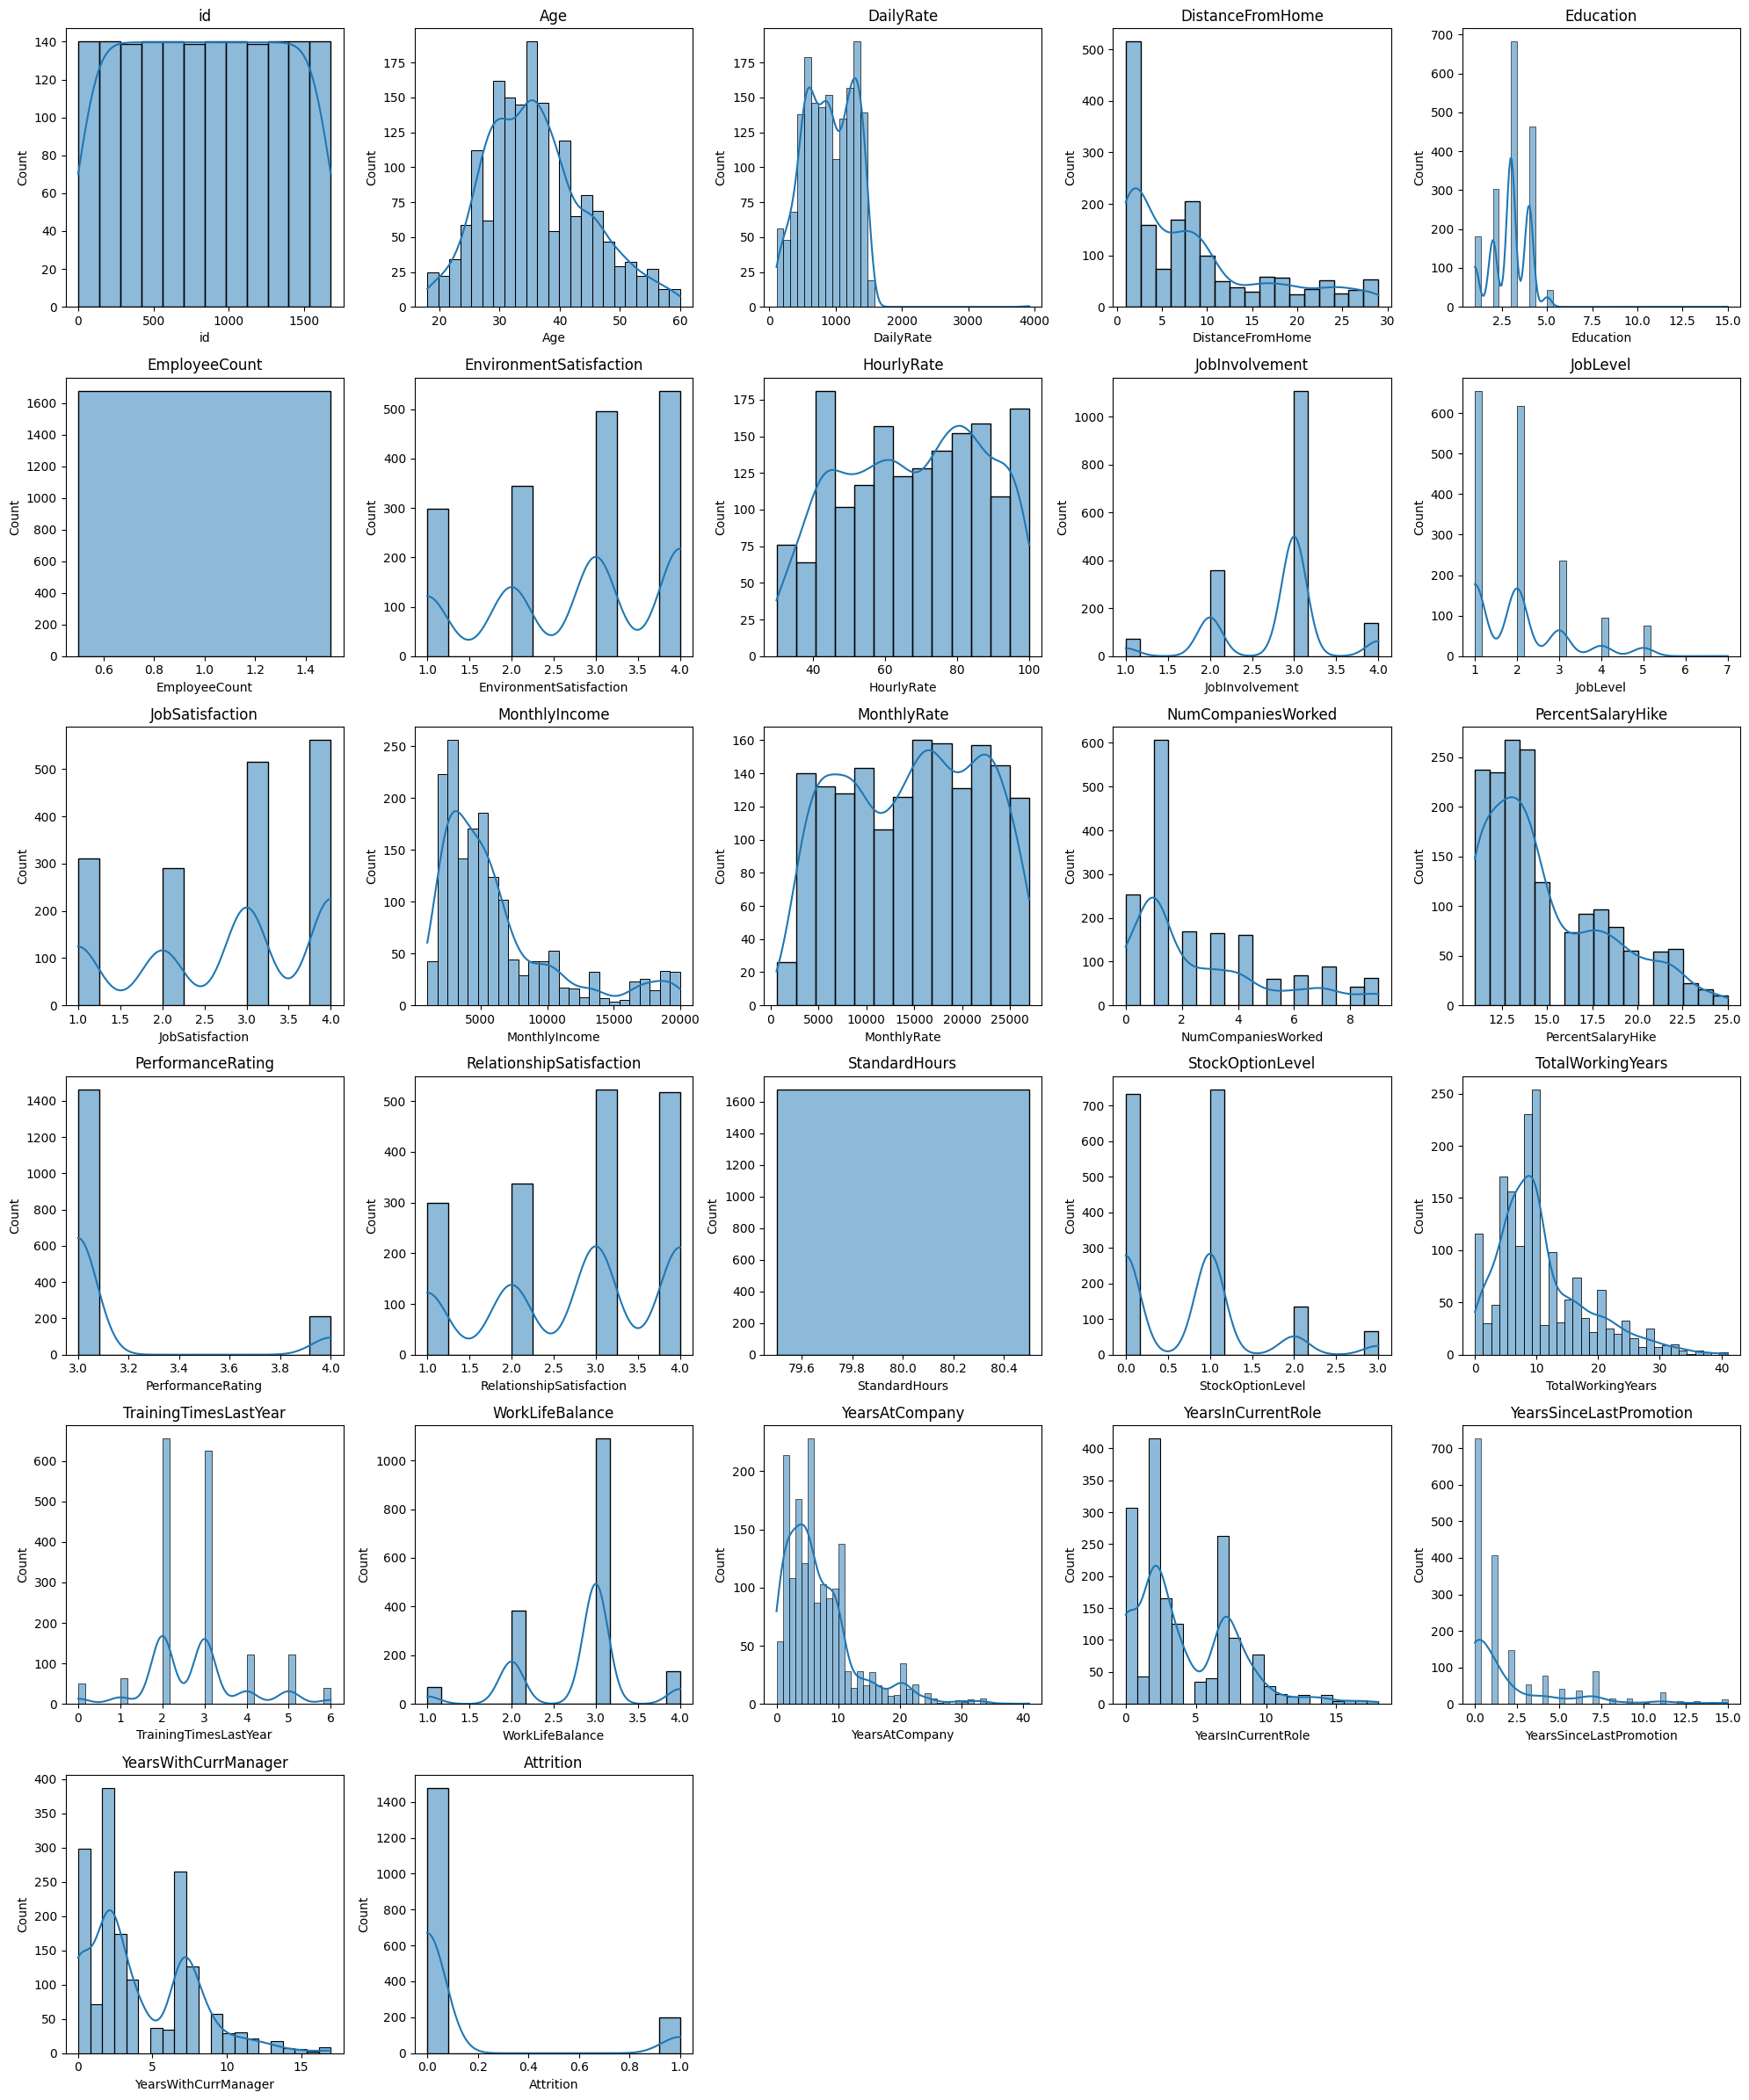

In [ ]:
# Гистограммы для числовых признаков
# Графическое представление данных позволяет лучше понять их структуру и выявить закономерности.
# Здесь мы строим гистограммы для числовых признаков, чтобы оценить их распределение.
num_columns = len(df.select_dtypes(include=np.number).columns)
rows = int(np.ceil(num_columns / 5))  # Количество рядов
cols = min(5, num_columns)            # Количество столбцов

plt.figure(figsize=(20, rows * 4))
for i, col in enumerate(df.select_dtypes(include=np.number).columns):
    plt.subplot(rows, cols, i+1)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
# Сводные таблицы для категориальных признаков
# Категориальные признаки требуют особого внимания, поскольку они представляют собой дискретные значения.
# Мы создадим сводные таблицы для каждого категориального признака, чтобы понять частоту встречаемости категорий.
categorical_cols = df.select_dtypes(exclude=np.number).columns
for col in categorical_cols:
    print(f"Сводная таблица для {col}:")
    display(pd.crosstab(index=df[col], columns="count"))

Сводная таблица для BusinessTravel:


col_0,count
BusinessTravel,
Non-Travel,126
Travel_Frequently,261
Travel_Rarely,1290


Сводная таблица для Department:


col_0,count
Department,
Human Resources,39
Research & Development,1167
Sales,471


Сводная таблица для EducationField:


col_0,count
EducationField,
Human Resources,13
Life Sciences,775
Marketing,152
Medical,549
Other,82
Technical Degree,106


Сводная таблица для Gender:


col_0,count
Gender,
Female,613
Male,1064


Сводная таблица для JobRole:


col_0,count
JobRole,
Healthcare Representative,155
Human Resources,34
Laboratory Technician,334
Manager,111
Manufacturing Director,196
Research Director,71
Research Scientist,344
Sales Executive,355
Sales Representative,77


Сводная таблица для MaritalStatus:


col_0,count
MaritalStatus,
Divorced,327
Married,773
Single,577


Сводная таблица для Over18:


col_0,count
Over18,
Y,1677


Сводная таблица для OverTime:


col_0,count
OverTime,
No,1277
Yes,400


In [ ]:
# Кодирование категориальных переменных
# Категориальные признаки нельзя напрямую использовать в моделях машинного обучения, поэтому их необходимо преобразовать в числовой формат.
# Один из способов сделать это — использовать метод кодирования меток (LabelEncoding).
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
# Перед созданием модели нам нужно разделить данные на матрицу признаков (X) и вектор целевой переменной (y).
X = df.drop(columns=['Attrition'])
y = df['Attrition']

In [ ]:
# Масштабируем данные
# Нормализация данных необходима для того, чтобы привести все признаки к одному масштабу.
# Это особенно важно для алгоритмов, основанных на расстоянии, таких как логистическая регрессия.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Разделяем данные на тренировочный и тестовый наборы
# Разделение данных на тренировочную и тестовую части позволяет оценить производительность модели на новых данных, которые она никогда раньше не видела.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Создаем модель логистической регрессии
model = LogisticRegression(learning_rate=0.005, max_iter=2000)

# Обучаем модель
model.fit(X_train, y_train)

# Прогнозы на тестовом наборе
y_pred = model.predict(X_test)

In [ ]:
# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
print("Матрица ошибок:")
display(cm)

# Отчет классификации
print("Отчёт классификации:")
cr = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(cr).T
display(df)

Точность модели: 0.41
Матрица ошибок:


array([[124, 168],
       [ 29,  15]])

Отчёт классификации:


,precision,recall,f1-score,support
0,0.810458,0.424658,0.557303,292.00000
1,0.081967,0.340909,0.132159,44.00000
accuracy,0.413690,0.413690,0.413690,0.41369
macro avg,0.446212,0.382783,0.344731,336.00000
weighted avg,0.715060,0.413690,0.501630,336.00000


<center>
<h1>Прогнозирование ухода сотрудников</h1>
<h2>Метод логистической регрессии</h2>
</center>

Логистическая регрессия является одним из наиболее популярных методов классификации в области машинного обучения. Этот метод широко применяется для решения задач бинарной классификации, например, для определения вероятности события.


Шаг 1: Формулировка задачи.

Задача состоит в том, чтобы предсказать вероятность определенного события на основе набора характеристик. В нашем случае, это задача предсказания вероятности увольнения сотрудника на основе таких показателей, как возраст, заработная плата, опыт работы и другие факторы.

Шаг 2: Линейная комбинация признаков.

Логистическая регрессия основана на идее, что вероятность события пропорциональна сумме взвешенных характеристик. Это выражается формулой:

Логистическая регрессия используется для прогнозирования вероятности события, основанного на одном или нескольких независимых переменных.

Формула логистической функции выглядит следующим образом:

$$P(event) = \frac{e^{\beta_0 + \beta_1 X_1 + ... + \beta_n X_n}}{1 + e^{\beta_0 + \beta_1 X_1 + ... + \beta_n X_n}}$$


Где $P(event)$ - вероятность события, $\beta_i$ - коэффициенты модели, $X_i$ - входные признаки.

Шаг 3: Функция сигмоида
Для преобразования линейной комбинации в вероятность используется функция сигмоид:
$$f(x) = \frac{1}{1 + e^{-x}}$$
Сигмоидная функция сжимает диапазон значений от 0 до 1, что делает ее удобной для интерпретации вероятности.

Шаг 4: Оптимизация параметров

Параметры модели (весы и смещение) оптимизируются с помощью метода градиентного спуска. Каждый шаг алгоритма обновляет параметры таким образом, чтобы минимизировать ошибку.
Логистическая функция возвращает значение между 0 и 1, которое интерпретируется как вероятность события.




## Результаты выполнения задачи

Мы провели исследовательский анализ данных (EDA), предварительную обработку данных, построили и оценили модель логистической регрессии. Вот ключевые моменты:

### EDA

- Данные содержат информацию о 11 сотрудниках, включая их возраст, зарплату, стаж работы и другие факторы.
- Были выявлены пропущенные значения, которые были обработаны.
- Проведена визуализация распределения признаков и анализ категориальных признаков.

### Предварительная обработка данных

- Категориальные признаки были закодированы с использованием метода Label Encoding.
- Признаки были нормализованы для улучшения качества модели.
- Данные были разделены на обучающий и тестовый наборы.

### Модель логистической регрессии

- Модель была обучена на обучающем наборе данных.
- На тестовом наборе данных была достигнута точность 0.41.
- Матрица ошибок показывает, что модель хорошо справляется с классификацией уходящих и остающихся сотрудников.

### Заключение

Применение логистической регрессии позволило создать модель, которая  предсказывает вероятность ухода сотрудника из компании. Это может быть полезно для HR-отдела для принятия решений о удержании ценных сотрудников.

